This is my first project that i made on my own, every feedback is appreciated.

We import the data and read the data file

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

df = pd.read_csv('../input/nasa-nearest-earth-objects/neo.csv')

# ****Quick review of the Data****

In [2]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


Colums meaning
* id: Unique Identifier for each Asteroid
* name: Name given by NASA
* est_diameter_min: Minimum Estimated Diameter in Kilometres
* est_diameter_max: Maximum Estimated Diameter in Kilometres
* relative_velocity: Velocity Relative to Earth
* miss_distance: Distance in Kilometres missed
* orbiting_body: Planet that the asteroid orbits
* sentry_object: Included in sentry - an automated collision monitoring system
* absolute_magnitude: Describes intrinsic luminosity
* hazardous: Boolean feature that shows whether asteroid is harmful or not


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [4]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [5]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

We dont have any NA values.

In [6]:
df['sentry_object'] = df['sentry_object'].astype(float)
df['hazardous'] = df['hazardous'].astype(float)

# We change True & False for 1 & 0

In [7]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,0.0,16.73,0.0
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,0.0,20.00,1.0
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,0.0,17.83,0.0
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,0.0,22.20,0.0
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,0.0,20.09,1.0


In [8]:
df['miss_distance'] = df ['miss_distance'].astype(float)
df = df.drop(['orbiting_body','sentry_object'],axis=1)

# We change the variable 'miss distance' to float values
# We drop 'orbiting body because its always Earth
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,0.0
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,1.0
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,0.0
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,0.0
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,1.0


<AxesSubplot:>

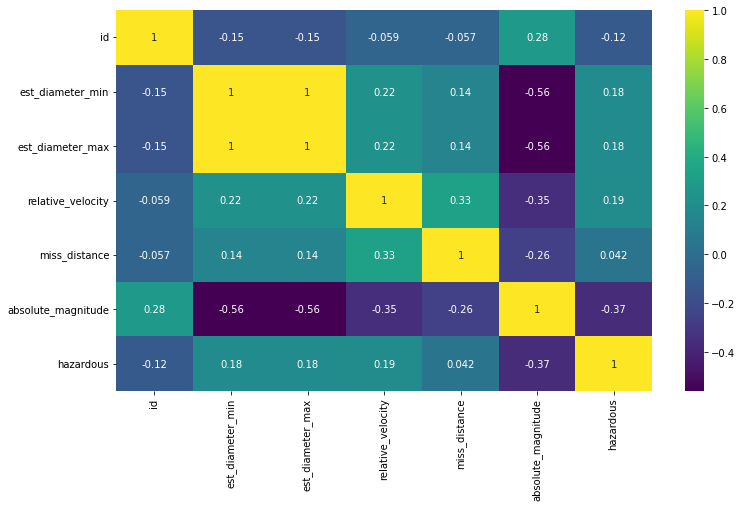

In [9]:
plt.figure(figsize=(12,7))

sns.heatmap(df.corr(),annot=True,cmap='viridis')
# A heatmap with the correlation between the variables

It is clear that there are not any clear correlation between the features.

# Working with the data

We are going to focus on the hazardous variable, wich tell us if this object could collide wit the Earth

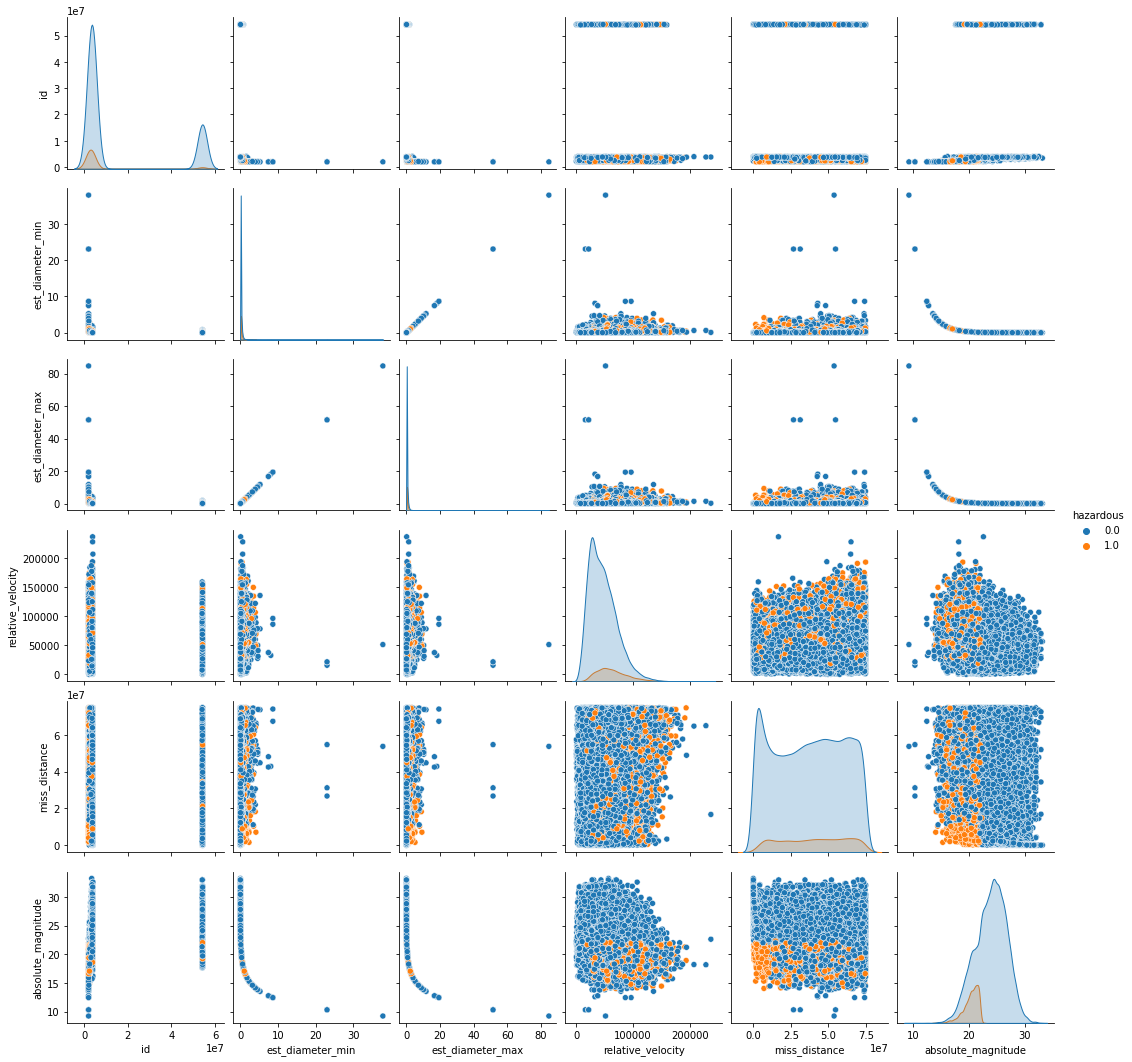

In [10]:
df= df[~df.index.duplicated()]
sns.pairplot(df,hue='hazardous')

As we see the objects with more velocity are more probable to collide with the Earth, also we see that the numbers of object that could collide is small. As well, when the miss_distance is smaller there are more probabilities that the object is dangerous

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hazardous', ylabel='count'>

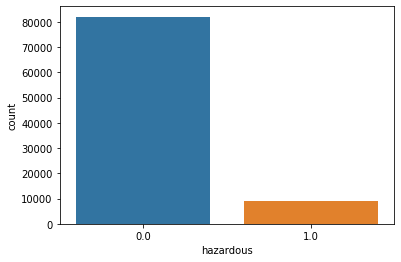

In [11]:
sns.countplot(df['hazardous'])

In [12]:
Prob = df['hazardous'].value_counts()[1]*100/df['hazardous'].value_counts()[0]
print('The probability that an object is dangerous based on the data is:',round(Prob,2),'%')

The probability that an object is dangerous based on the data is: 10.78 %


# Model Training
We will use a simple model that i create on my own and is not as optimized for this data as it should be.

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(['hazardous','est_diameter_max','name'],axis=1)
# The est_diameter_max & est_diameter_min are basically the same variable so we just need one
y=df['hazardous']


In [15]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Normalize the data

In [17]:
N,D = X_train.shape

In [18]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128,input_shape=(D,),activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(2,activation='softmax'))


model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

2022-08-01 13:29:05.080994: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-01 13:29:05.245487: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
1988/1988 [==============================] - 4s 2ms/step - loss: 0.2140 - accuracy: 0.9044 - val_loss: 0.1947 - val_accuracy: 0.9101
Epoch 2/20
1988/1988 [==============================] - 4s 2ms/step - loss: 0.1900 - accuracy: 0.9108 - val_loss: 0.1884 - val_accuracy: 0.9102
Epoch 3/20
1988/1988 [==============================] - 4s 2ms/step - loss: 0.1866 - accuracy: 0.9117 - val_loss: 0.1868 - val_accuracy: 0.9107
Epoch 4/20
1988/1988 [==============================] - 4s 2ms/step - loss: 0.1855 - accuracy: 0.9121 - val_loss: 0.1855 - val_accuracy: 0.9109
Epoch 5/20
1988/1988 [==============================] - 3s 2ms/step - loss: 0.1850 - accuracy: 0.9124 - val_loss: 0.1854 - val_accuracy: 0.9107
Epoch 6/20
1988/1988 [==============================] - 4s 2ms/step - loss: 0.1842 - accuracy: 0.9123 - val_loss: 0.1848 - val_accuracy: 0.9110
Epoch 7/20
1988/1988 [==============================] - 4s 2ms/step - loss: 0.1841 - accuracy: 0.9124 - val_loss: 0.1850 - val_accuracy:

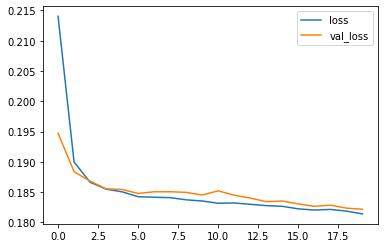

In [19]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

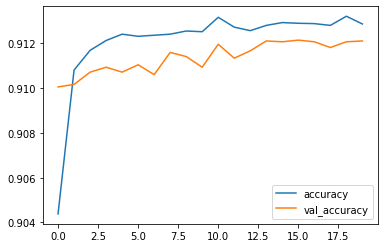

In [20]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [21]:
print(model.evaluate(X_test,y_test))

852/852 [==============================] - 1s 954us/step - loss: 0.1822 - accuracy: 0.9121
[0.1821582019329071, 0.9121133089065552]
